<a href="https://colab.research.google.com/github/JeelCueva/modelos-arch-garch/blob/main/TAREA_2_Aplicacion_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Conectar colab con drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importando datos del drive a pandas
import pandas as pd

ruta = "/content/drive/MyDrive/data.csv"
data = pd.read_csv(ruta)

print(data.head())

   mora  atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro  ingreso  \
0     0     235  FAMILIAR    30      3748    93.0             5   3500.0   
1     0      18  FAMILIAR    32      4598     9.0            12    900.0   
2     0       0  FAMILIAR    26      5148     8.0             2   2400.0   
3     0       0  FAMILIAR    36      5179    20.0            12   2700.0   
4     0       0  FAMILIAR    46      3960     NaN             1   3100.0   

   linea_sf  deuda_sf  score         zona  clasif_sbs     nivel_educ  
0       NaN      0.00    214         Lima           4  UNIVERSITARIA  
1   1824.67   1933.75    175  La Libertad           1        TECNICA  
2   2797.38    188.29    187         Lima           0  UNIVERSITARIA  
3       NaN      0.00    187       Ancash           0        TECNICA  
4   2000.00  11010.65    189         Lima           0        TECNICA  


In [4]:
# Explorando datos
data.describe()

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs
count,8399.000000,8399.00000,8399.000000,8399.000000,6569.000000,8399.000000,8399.000000,7272.000000,7938.000000,8399.000000,8399.000000
mean,0.704251,4.46315,36.399095,5555.888796,32.401583,10.593166,4350.406997,11987.241038,6110.724308,196.619955,0.563519
std,0.456406,14.27084,9.825764,2153.244140,32.866232,3.374619,5367.058953,21322.801655,11177.989799,19.544348,0.905637
min,0.000000,0.00000,20.000000,2956.000000,0.000000,0.000000,123.700000,0.000000,0.000000,134.000000,0.000000
25%,0.000000,0.00000,29.000000,4174.000000,7.000000,12.000000,1366.670000,1169.372500,478.320000,182.000000,0.000000
50%,1.000000,0.00000,34.000000,4904.000000,20.000000,12.000000,2400.000000,4030.120000,2258.755000,197.000000,0.000000
75%,1.000000,2.00000,42.000000,6182.000000,51.000000,12.000000,4900.000000,12086.627500,5755.150000,212.000000,1.000000
max,1.000000,245.00000,85.000000,20700.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,4.000000


In [5]:
# Explorando datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mora          8399 non-null   int64  
 1   atraso        8399 non-null   int64  
 2   vivienda      8399 non-null   object 
 3   edad          8399 non-null   int64  
 4   dias_lab      8399 non-null   int64  
 5   exp_sf        6569 non-null   float64
 6   nivel_ahorro  8399 non-null   int64  
 7   ingreso       8399 non-null   float64
 8   linea_sf      7272 non-null   float64
 9   deuda_sf      7938 non-null   float64
 10  score         8399 non-null   int64  
 11  zona          8399 non-null   object 
 12  clasif_sbs    8399 non-null   int64  
 13  nivel_educ    8399 non-null   object 
dtypes: float64(4), int64(7), object(3)
memory usage: 918.8+ KB


**Tratamiento de datos**

In [6]:
# Separar data en X e y
data.columns

X=data.loc[:,['atraso', 'vivienda', 'edad', 'dias_lab', 'exp_sf',
       'nivel_ahorro', 'ingreso', 'linea_sf', 'deuda_sf', 'score', 'zona',
       'clasif_sbs', 'nivel_educ']]
y=data.loc[:,['mora']]

In [7]:
X.head(5),y.head(5)

(   atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro  ingreso  linea_sf  \
 0     235  FAMILIAR    30      3748    93.0             5   3500.0       NaN   
 1      18  FAMILIAR    32      4598     9.0            12    900.0   1824.67   
 2       0  FAMILIAR    26      5148     8.0             2   2400.0   2797.38   
 3       0  FAMILIAR    36      5179    20.0            12   2700.0       NaN   
 4       0  FAMILIAR    46      3960     NaN             1   3100.0   2000.00   
 
    deuda_sf  score         zona  clasif_sbs     nivel_educ  
 0      0.00    214         Lima           4  UNIVERSITARIA  
 1   1933.75    175  La Libertad           1        TECNICA  
 2    188.29    187         Lima           0  UNIVERSITARIA  
 3      0.00    187       Ancash           0        TECNICA  
 4  11010.65    189         Lima           0        TECNICA  ,
    mora
 0     0
 1     0
 2     0
 3     0
 4     0)

In [8]:
# Separando data en train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y,test_size=0.2, random_state=4)

In [9]:
Xtrain.head(), Xtest.head(), ytrain.head(), ytest.head()

(      atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro  ingreso  \
 5719      27  FAMILIAR    35      4995    15.0            12  3300.00   
 2404       7  FAMILIAR    28      4264     NaN            12  1400.00   
 4625       2    PROPIA    35     11204     NaN            12  1850.00   
 6015       0    PROPIA    28      6078     0.0            12  2105.77   
 5346       0  FAMILIAR    32      6821    19.0            12  3000.00   
 
       linea_sf  deuda_sf  score       zona  clasif_sbs     nivel_educ  
 5719    355.10   6178.08    221  Cajamarca           1  UNIVERSITARIA  
 2404   1824.45     27.14    185       Lima           0  UNIVERSITARIA  
 4625   3066.46   1405.24    221  Cajamarca           0  UNIVERSITARIA  
 6015   6900.00   9632.75    207     Callao           2  UNIVERSITARIA  
 5346  10087.00    933.68    200       Lima           1  UNIVERSITARIA  ,
       atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro  ingreso  \
 7959       0    PROPIA    49     13061  

**Pre procesamiento de datos**

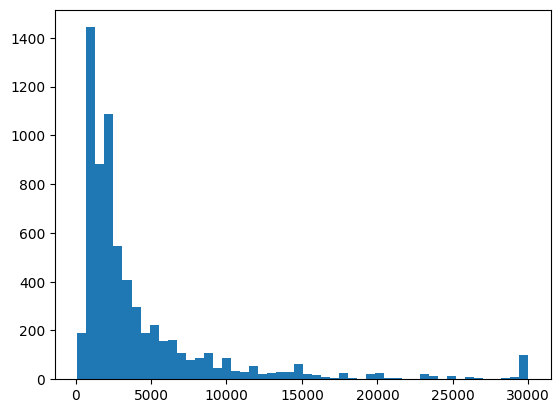

In [10]:
# Análisis de valores extremos
###############################

# Detección
############

# Análisis visual
import matplotlib.pyplot as plt

# Histograma
plt.hist(Xtrain.ingreso, bins=50)
plt.show()

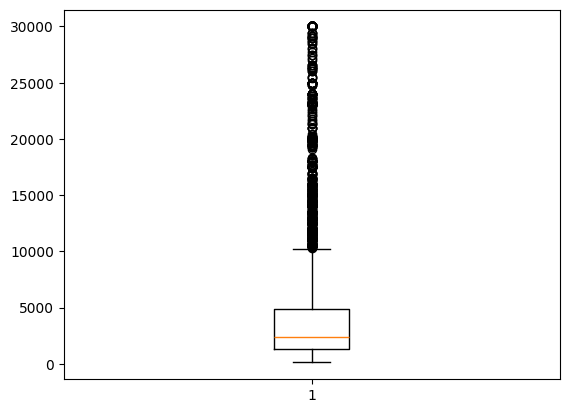

In [11]:
# Boxplot
plt.boxplot(Xtrain.ingreso)
plt.show()

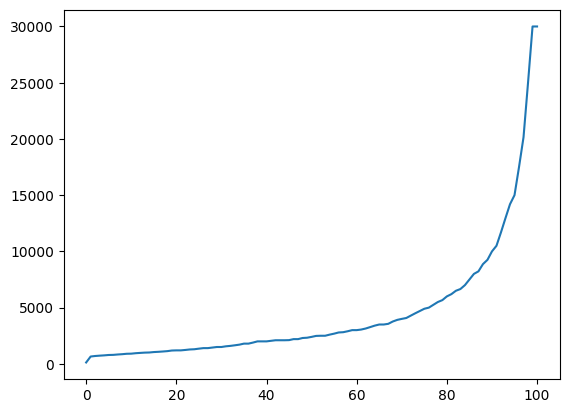

In [12]:
# Importando libreria
import numpy as np

# Calculando percentiles
perc=np.nanpercentile(Xtrain.ingreso,range(101))
plt.plot(perc)

In [13]:
# Tratamiento de outliers
# xi>=cota superior -->xi=cota superior
# xi<=cota inferior --> xi=cota inferior
# cota inferior<= xi <= cota uspioer -->xi=xi

# Acotando variable
cotas_ingreso=np.nanpercentile(Xtrain.ingreso, [1,99])
cotas_ingreso

array([  652.8602, 30000.    ])

In [14]:
# Asignando cotas
[np.min(Xtrain.ingreso),np.max(Xtrain.ingreso)]

[123.7, 30000.0]

In [15]:
Xtrain.loc[Xtrain.ingreso>=cotas_ingreso[1],'ingreso']=cotas_ingreso[1]
Xtrain.loc[Xtrain.ingreso<=cotas_ingreso[0],'ingreso']=cotas_ingreso[0]

In [16]:
# Verificando
[np.min(Xtrain.ingreso),np.max(Xtrain.ingreso)]

[652.8602, 30000.0]

In [17]:
# Tratamiento de missings
##########################

# Cuantificando
print(np.sum(Xtrain.isnull(),axis=0)) # absolutos
print(np.mean(Xtrain.isnull(),axis=0)) # relativos

atraso             0
vivienda           0
edad               0
dias_lab           0
exp_sf          1491
nivel_ahorro       0
ingreso            0
linea_sf         910
deuda_sf         379
score              0
zona               0
clasif_sbs         0
nivel_educ         0
dtype: int64
atraso          0.000000
vivienda        0.000000
edad            0.000000
dias_lab        0.000000
exp_sf          0.221908
nivel_ahorro    0.000000
ingreso         0.000000
linea_sf        0.135437
deuda_sf        0.056407
score           0.000000
zona            0.000000
clasif_sbs      0.000000
nivel_educ      0.000000
dtype: float64


In [18]:
# Asignar missings
Xtrain.exp_sf.fillna(np.mean(Xtrain.exp_sf),inplace=True)
Xtrain.linea_sf.fillna(0,inplace=True)
Xtrain.deuda_sf.fillna(0,inplace=True)

/tmp/ipython-input-3360105072.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Xtrain.exp_sf.fillna(np.mean(Xtrain.exp_sf),inplace=True)
/tmp/ipython-input-3360105072.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [19]:
# Verificando
print(np.sum(Xtrain.isnull(),axis=0)) # absolutos
print(np.mean(Xtrain.isnull(),axis=0)) # relativos

atraso          0
vivienda        0
edad            0
dias_lab        0
exp_sf          0
nivel_ahorro    0
ingreso         0
linea_sf        0
deuda_sf        0
score           0
zona            0
clasif_sbs      0
nivel_educ      0
dtype: int64
atraso          0.0
vivienda        0.0
edad            0.0
dias_lab        0.0
exp_sf          0.0
nivel_ahorro    0.0
ingreso         0.0
linea_sf        0.0
deuda_sf        0.0
score           0.0
zona            0.0
clasif_sbs      0.0
nivel_educ      0.0
dtype: float64


In [20]:
# Tratamiento de variables cualitativas
#######################################
Xtrain.nivel_educ.value_counts()

,count
nivel_educ,
UNIVERSITARIA,3822
TECNICA,2657
SECUNDARIA,208
SIN EDUCACION,32


In [21]:
# Calculando el OR/WOE/IV/RD
data_train=pd.concat([Xtrain,ytrain],axis=1)

In [22]:
# Calculando
base=pd.DataFrame(data_train.groupby(['nivel_educ'])['mora'].agg(Malos='sum',Total='count',RD='mean'))
base.head(100)

,Malos,Total,RD
nivel_educ,,,
SECUNDARIA,164,208,0.788462
SIN EDUCACION,23,32,0.718750
TECNICA,2111,2657,0.794505
UNIVERSITARIA,2432,3822,0.636316


In [23]:
base['Buenos']=base.Total-base.Malos
base['OR']=base.Buenos/base.Malos
base['WOE']=np.log((base.Buenos/np.sum(base.Buenos))/(base.Malos/np.sum(base.Malos)))
base.head(100)

,Malos,Total,RD,Buenos,OR,WOE
nivel_educ,,,,,,
SECUNDARIA,164,208,0.788462,44,0.268293,-0.449384
SIN EDUCACION,23,32,0.718750,9,0.391304,-0.071976
TECNICA,2111,2657,0.794505,546,0.258645,-0.486005
UNIVERSITARIA,2432,3822,0.636316,1390,0.571546,0.306883


In [24]:
base['Dif']=(base.Buenos/np.sum(base.Buenos))-(base.Malos/np.sum(base.Malos))
# Calculando IV
np.sum(base.WOE*base.Dif)

np.float64(0.14583009164725605)

In [25]:
# Función IV
def iv(variable):
    base=pd.DataFrame(data_train.groupby([variable])['mora'].agg(Malos='sum',
                                                               Total='count',
                                                               RD='mean'))
    base['Buenos']=base.Total-base.Malos
    base['WOE']=np.log((base.Buenos/np.sum(base.Buenos))/(base.Malos/np.sum(base.Malos)))
    base['Dif']=(base.Buenos/np.sum(base.Buenos))-(base.Malos/np.sum(base.Malos))
    # Calculando IV
    print('El IV de la variable',variable,'es:',np.sum(base.WOE*base.Dif))

In [26]:
iv('vivienda')
iv('zona')
iv('clasif_sbs')
iv('nivel_educ')

El IV de la variable vivienda es: 0.028418450354341283
El IV de la variable zona es: 0.1403829815756496
El IV de la variable clasif_sbs es: 0.037707568132823825
El IV de la variable nivel_educ es: 0.14583009164725605


In [27]:
lista_variables=['vivienda','zona','clasif_sbs','nivel_educ']
for i in lista_variables:
  iv(i)

El IV de la variable vivienda es: 0.028418450354341283
El IV de la variable zona es: 0.1403829815756496
El IV de la variable clasif_sbs es: 0.037707568132823825
El IV de la variable nivel_educ es: 0.14583009164725605


In [28]:
# Asignación

# Vivienda -> OR
base_viv=pd.DataFrame(data_train.groupby(['vivienda'])['mora'].agg(Malos='sum',Total='count',RD='mean'))
base_viv['Buenos']=base_viv.Total-base_viv.Malos
base_viv['OR']=base_viv.Buenos/base_viv.Malos
base_viv.head(10)

,Malos,Total,RD,Buenos,OR
vivienda,,,,,
ALQUILADA,104,134,0.776119,30,0.288462
FAMILIAR,3375,4658,0.724560,1283,0.380148
PROPIA,1251,1927,0.649196,676,0.540368


In [29]:
Xtrain['vivienda_f']=np.where(Xtrain.vivienda=='ALQUILADA',base_viv.loc['ALQUILADA','OR'],
                              np.where(Xtrain.vivienda=='FAMILIAR',base_viv.loc['FAMILIAR','OR'],
                                       base_viv.loc['PROPIA','OR']))
Xtrain.head(10)

,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ,vivienda_f
5719,27,FAMILIAR,35,4995,15.000000,12,3300.00,355.10,6178.08,221,Cajamarca,1,UNIVERSITARIA,0.380148
2404,7,FAMILIAR,28,4264,32.434392,12,1400.00,1824.45,27.14,185,Lima,0,UNIVERSITARIA,0.380148
4625,2,PROPIA,35,11204,32.434392,12,1850.00,3066.46,1405.24,221,Cajamarca,0,UNIVERSITARIA,0.540368
6015,0,PROPIA,28,6078,0.000000,12,2105.77,6900.00,9632.75,207,Callao,2,UNIVERSITARIA,0.540368
5346,0,FAMILIAR,32,6821,19.000000,12,3000.00,10087.00,933.68,200,Lima,1,UNIVERSITARIA,0.380148
3166,0,FAMILIAR,30,4386,14.000000,12,3000.00,5557.09,1624.34,191,Lima,1,TECNICA,0.380148
7856,0,FAMILIAR,37,6365,89.000000,12,7000.00,3814.01,1823.53,202,Lima,0,UNIVERSITARIA,0.380148
4834,0,FAMILIAR,45,13548,13.000000,11,3050.00,13345.00,3460.23,198,Lima,2,UNIVERSITARIA,0.380148
2270,0,FAMILIAR,40,4758,32.434392,12,1966.78,600.00,8777.24,179,Tumbes,0,TECNICA,0.380148
1169,0,FAMILIAR,29,5544,52.000000,12,12050.00,32720.00,8668.23,212,Lima,0,UNIVERSITARIA,0.380148


In [30]:
Xtrain.columns
# Nivel educativo -> dummies
Xtrain.nivel_educ.value_counts()
# Generando dummies
dummy_nivel=pd.get_dummies(Xtrain.nivel_educ,prefix='d').astype('int')
#dummy_nivel.head(10)
# Unificando información
Xtrain=pd.concat([Xtrain,dummy_nivel],axis=1)
Xtrain.head(10)

,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ,vivienda_f,d_SECUNDARIA,d_SIN EDUCACION,d_TECNICA,d_UNIVERSITARIA
5719,27,FAMILIAR,35,4995,15.000000,12,3300.00,355.10,6178.08,221,Cajamarca,1,UNIVERSITARIA,0.380148,0,0,0,1
2404,7,FAMILIAR,28,4264,32.434392,12,1400.00,1824.45,27.14,185,Lima,0,UNIVERSITARIA,0.380148,0,0,0,1
4625,2,PROPIA,35,11204,32.434392,12,1850.00,3066.46,1405.24,221,Cajamarca,0,UNIVERSITARIA,0.540368,0,0,0,1
6015,0,PROPIA,28,6078,0.000000,12,2105.77,6900.00,9632.75,207,Callao,2,UNIVERSITARIA,0.540368,0,0,0,1
5346,0,FAMILIAR,32,6821,19.000000,12,3000.00,10087.00,933.68,200,Lima,1,UNIVERSITARIA,0.380148,0,0,0,1
3166,0,FAMILIAR,30,4386,14.000000,12,3000.00,5557.09,1624.34,191,Lima,1,TECNICA,0.380148,0,0,1,0
7856,0,FAMILIAR,37,6365,89.000000,12,7000.00,3814.01,1823.53,202,Lima,0,UNIVERSITARIA,0.380148,0,0,0,1
4834,0,FAMILIAR,45,13548,13.000000,11,3050.00,13345.00,3460.23,198,Lima,2,UNIVERSITARIA,0.380148,0,0,0,1
2270,0,FAMILIAR,40,4758,32.434392,12,1966.78,600.00,8777.24,179,Tumbes,0,TECNICA,0.380148,0,0,1,0
1169,0,FAMILIAR,29,5544,52.000000,12,12050.00,32720.00,8668.23,212,Lima,0,UNIVERSITARIA,0.380148,0,0,0,1


In [31]:
# Zona -> Agrupaciones
Xtrain.zona.value_counts()
Xtrain['zona_f']=np.where((Xtrain.zona=='Lima')|(Xtrain.zona=='Callao'),1,0)

# Clasificación SBS -> Agrupaciones
Xtrain.clasif_sbs.value_counts()
Xtrain['clasif_normal']=np.where(Xtrain.clasif_sbs==0,1,0)

Xtrain.head(10)

,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ,vivienda_f,d_SECUNDARIA,d_SIN EDUCACION,d_TECNICA,d_UNIVERSITARIA,zona_f,clasif_normal
5719,27,FAMILIAR,35,4995,15.000000,12,3300.00,355.10,6178.08,221,Cajamarca,1,UNIVERSITARIA,0.380148,0,0,0,1,0,0
2404,7,FAMILIAR,28,4264,32.434392,12,1400.00,1824.45,27.14,185,Lima,0,UNIVERSITARIA,0.380148,0,0,0,1,1,1
4625,2,PROPIA,35,11204,32.434392,12,1850.00,3066.46,1405.24,221,Cajamarca,0,UNIVERSITARIA,0.540368,0,0,0,1,0,1
6015,0,PROPIA,28,6078,0.000000,12,2105.77,6900.00,9632.75,207,Callao,2,UNIVERSITARIA,0.540368,0,0,0,1,1,0
5346,0,FAMILIAR,32,6821,19.000000,12,3000.00,10087.00,933.68,200,Lima,1,UNIVERSITARIA,0.380148,0,0,0,1,1,0
3166,0,FAMILIAR,30,4386,14.000000,12,3000.00,5557.09,1624.34,191,Lima,1,TECNICA,0.380148,0,0,1,0,1,0
7856,0,FAMILIAR,37,6365,89.000000,12,7000.00,3814.01,1823.53,202,Lima,0,UNIVERSITARIA,0.380148,0,0,0,1,1,1
4834,0,FAMILIAR,45,13548,13.000000,11,3050.00,13345.00,3460.23,198,Lima,2,UNIVERSITARIA,0.380148,0,0,0,1,1,0
2270,0,FAMILIAR,40,4758,32.434392,12,1966.78,600.00,8777.24,179,Tumbes,0,TECNICA,0.380148,0,0,1,0,0,1
1169,0,FAMILIAR,29,5544,52.000000,12,12050.00,32720.00,8668.23,212,Lima,0,UNIVERSITARIA,0.380148,0,0,0,1,1,1


In [32]:
# Eliminando variables que ya no son necesarias
Xtrain.drop(['vivienda','clasif_sbs','zona','nivel_educ'],axis=1,inplace=True)
Xtrain.head(10)

,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,vivienda_f,d_SECUNDARIA,d_SIN EDUCACION,d_TECNICA,d_UNIVERSITARIA,zona_f,clasif_normal
5719,27,35,4995,15.000000,12,3300.00,355.10,6178.08,221,0.380148,0,0,0,1,0,0
2404,7,28,4264,32.434392,12,1400.00,1824.45,27.14,185,0.380148,0,0,0,1,1,1
4625,2,35,11204,32.434392,12,1850.00,3066.46,1405.24,221,0.540368,0,0,0,1,0,1
6015,0,28,6078,0.000000,12,2105.77,6900.00,9632.75,207,0.540368,0,0,0,1,1,0
5346,0,32,6821,19.000000,12,3000.00,10087.00,933.68,200,0.380148,0,0,0,1,1,0
3166,0,30,4386,14.000000,12,3000.00,5557.09,1624.34,191,0.380148,0,0,1,0,1,0
7856,0,37,6365,89.000000,12,7000.00,3814.01,1823.53,202,0.380148,0,0,0,1,1,1
4834,0,45,13548,13.000000,11,3050.00,13345.00,3460.23,198,0.380148,0,0,0,1,1,0
2270,0,40,4758,32.434392,12,1966.78,600.00,8777.24,179,0.380148,0,0,1,0,0,1
1169,0,29,5544,52.000000,12,12050.00,32720.00,8668.23,212,0.380148,0,0,0,1,1,1


**Aplicando las lógicas de train en test**

In [33]:
# Asignación de cotas
Xtest.loc[Xtest.ingreso>=cotas_ingreso[1],'ingreso']=cotas_ingreso[1]
Xtest.loc[Xtest.ingreso<=cotas_ingreso[0],'ingreso']=cotas_ingreso[0]

# Asignación de missings
Xtest.exp_sf.fillna(np.mean(Xtrain.exp_sf),inplace=True)
Xtest.linea_sf.fillna(0,inplace=True)
Xtest.deuda_sf.fillna(0,inplace=True)

# Tratamiento de variables cualitativas
Xtest['vivienda_f']=np.where(Xtest.vivienda=='ALQUILADA',base_viv.loc['ALQUILADA','OR'],
                              np.where(Xtest.vivienda=='FAMILIAR',base_viv.loc['FAMILIAR','OR'],
                                       base_viv.loc['PROPIA','OR']))

dummy_nivel=pd.get_dummies(Xtest.nivel_educ,prefix='d').astype('int')
Xtest=pd.concat([Xtest,dummy_nivel],axis=1)

Xtest['zona_f']=np.where((Xtest.zona=='Lima')|(Xtest.zona=='Callao'),1,0)

Xtest['clasif_normal']=np.where(Xtest.clasif_sbs==0,1,0)

# Eliminando variables que ya no son necesarias
Xtest.drop(['vivienda','clasif_sbs','zona','nivel_educ'],axis=1,inplace=True)

/tmp/ipython-input-3211326105.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Xtest.exp_sf.fillna(np.mean(Xtrain.exp_sf),inplace=True)
/tmp/ipython-input-3211326105.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [34]:
# Verificando
[Xtrain.shape,Xtest.shape]

[(6719, 16), (1680, 16)]

**Aplicando algoritmos**

In [35]:
# scikit learn
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
# statsmodels
# https://www.statsmodels.org/stable/examples/notebooks/generated/discrete_choice_overview.html#

In [36]:
# Importando libreria
from sklearn.linear_model import LogisticRegression
# Generando objeto
logistic=LogisticRegression()
# Entrenamiento
logistic.fit(Xtrain,ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Predicción: Probabilidad
ytrain['pr_y']=logistic.predict_proba(Xtrain)[:,1] # P(Y=1)
ytest['pr_y']=logistic.predict_proba(Xtest)[:,1] # P(Y=1)

In [38]:
ytrain.head(), ytest.head()

(      mora      pr_y
 5719     1  0.867476
 2404     1  0.701519
 4625     1  0.670251
 6015     0  0.771054
 5346     0  0.682740,
       mora      pr_y
 7959     0  0.409478
 6526     1  0.762895
 4028     1  0.798627
 1944     1  0.774845
 4432     1  0.699081)

In [39]:
# Predicción: Probabilidad redondeada
ytrain['y_est']=logistic.predict(Xtrain) # P(Y=1)>c -> 1 /// P(Y=1)<c -> 0 /// c=0.5
ytest['y_est']=logistic.predict(Xtest)

In [40]:
ytrain.head(), ytest.head()

(      mora      pr_y  y_est
 5719     1  0.867476      1
 2404     1  0.701519      1
 4625     1  0.670251      1
 6015     0  0.771054      1
 5346     0  0.682740      1,
       mora      pr_y  y_est
 7959     0  0.409478      0
 6526     1  0.762895      1
 4028     1  0.798627      1
 1944     1  0.774845      1
 4432     1  0.699081      1)

In [41]:
# Performance: Tasa de aciertos
print(logistic.score(Xtrain, ytrain.mora))
print(logistic.score(Xtest, ytest.mora))

0.7200476261348415
0.7226190476190476


In [42]:
# Performance: Matriz de confusión
from sklearn.metrics import confusion_matrix

# En train
##########
cm=confusion_matrix(ytrain.mora,ytrain.y_est)
# Tasa de aciertos
print((cm[0,0]+cm[1,1])/np.sum(cm))
# Sensibilidad
print(cm[1,1]/np.sum(cm[1,:]))
# Especificidad
print(cm[0,0]/np.sum(cm[0,:]))

0.7200476261348415
0.9534883720930233
0.1649069884364002


In [43]:
# En train personalizado
#########################
cm=confusion_matrix(ytrain.mora,np.where(ytrain.pr_y>=0.25,1,0))
# Tasa de aciertos
print((cm[0,0]+cm[1,1])/np.sum(cm))
# Sensibilidad
print(cm[1,1]/np.sum(cm[1,:]))
# Especificidad
print(cm[0,0]/np.sum(cm[0,:]))

0.710373567495163
0.9957716701902748
0.03167420814479638


In [44]:
# En test
##########
cm=confusion_matrix(ytest.mora,ytest.y_est)
# Tasa de aciertos
print((cm[0,0]+cm[1,1])/np.sum(cm))
# Sensibilidad
print(cm[1,1]/np.sum(cm[1,:]))
# Especificidad
print(cm[0,0]/np.sum(cm[0,:]))

0.7226190476190476
0.9535864978902954
0.1696969696969697


In [45]:
# En test personalizado
########################
cm=confusion_matrix(ytest.mora,np.where(ytest.pr_y>=0.25,1,0))
# Tasa de aciertos
print((cm[0,0]+cm[1,1])/np.sum(cm))
# Sensibilidad
print(cm[1,1]/np.sum(cm[1,:]))
# Especificidad
print(cm[0,0]/np.sum(cm[0,:]))

0.7142857142857143
1.0
0.030303030303030304


In [46]:
# Performance: Gini del modelo
from sklearn.metrics import roc_auc_score
# Train
print(2*roc_auc_score(ytrain.mora,ytrain.pr_y)-1)
# Test
print(2*roc_auc_score(ytest.mora,ytest.pr_y)-1)

0.29013166496066645
0.2980982824020799


In [47]:
# Performance: Gini de variables (Ingreso)

# Train
print(np.abs(2*roc_auc_score(ytrain.mora,Xtrain.ingreso)-1))
# Test
print(np.abs(2*roc_auc_score(ytest.mora,Xtest.ingreso)-1))

0.29327633910397255
0.28370967054511353


In [48]:
# Performance: Gini del modelo anterior

# Train
print(np.abs(2*roc_auc_score(ytrain.mora,data.loc[Xtrain.index,'score'])-1))
# Test
print(np.abs(2*roc_auc_score(ytest.mora,data.loc[Xtest.index,'score'])-1))

0.2782160232228632
0.24318288368921281


In [49]:
# Precisión: Calibración

# En términos generales
print(np.mean(ytrain.mora),np.mean(ytrain.pr_y))
print(np.mean(ytest.mora),np.mean(ytest.pr_y))

0.7039738056258372 0.6957042726945369
0.7053571428571429 0.6944281323369375


In [50]:
# Generando intervalos de confianza
import scipy.stats as st

# En train
alpha=0.05
z=st.norm.ppf(alpha/2)
p=np.mean(ytrain.pr_y)
n=len(Xtrain)

# LS: p-z*(p*(1-p)/n)**0.5
# LI: p+z*(p*(1-p)/n)**0.5

In [51]:
lim_sup=p-z*(p*(1-p)/n)**0.5
lim_inf=p+z*(p*(1-p)/n)**0.5
[lim_inf,np.mean(ytrain.mora),lim_sup]

[np.float64(0.6847026680768544),
 np.float64(0.7039738056258372),
 np.float64(0.7067058773122195)]

In [52]:
# En test
alpha=0.05
z=st.norm.ppf(alpha/2)
p=np.mean(ytest.pr_y)
n=len(Xtest)
lim_sup=p-z*(p*(1-p)/n)**0.5
lim_inf=p+z*(p*(1-p)/n)**0.5
[lim_inf,np.mean(ytest.mora),lim_sup]

[np.float64(0.672400704472199),
 np.float64(0.7053571428571429),
 np.float64(0.7164555602016759)]

In [53]:
# Precisión por drivers: Nivel de ahorro
perf1=pd.DataFrame(data_train.groupby(['nivel_ahorro'])['mora'].agg(N='count',RD='mean'))
data_train['pr_y']=logistic.predict_proba(Xtrain)[:,1]
perf2=pd.DataFrame(data_train.groupby(['nivel_ahorro'])['pr_y'].agg(PD='mean'))
perf_ahorro=pd.concat([perf1,perf2],axis=1)
# Intervalos de confianza
perf_ahorro['LS']=perf_ahorro.PD-z*(perf_ahorro.PD*(1-perf_ahorro.PD)/perf_ahorro.N)**0.5
perf_ahorro['LI']=perf_ahorro.PD+z*(perf_ahorro.PD*(1-perf_ahorro.PD)/perf_ahorro.N)**0.5
perf_ahorro

,N,RD,PD,LS,LI
nivel_ahorro,,,,,
0,393,0.773537,0.708389,0.753325,0.663454
1,74,0.851351,0.739160,0.839203,0.639116
2,57,0.824561,0.751341,0.863551,0.639131
3,51,0.764706,0.742215,0.862264,0.622167
4,79,0.886076,0.747279,0.843108,0.651450
5,56,0.928571,0.738150,0.853297,0.623003
6,78,0.833333,0.691661,0.794146,0.589176
7,60,0.850000,0.759825,0.867916,0.651733
8,79,0.810127,0.710471,0.810483,0.610459


In [54]:
data_train=pd.concat([Xtrain,ytrain],axis=1)
data_test=pd.concat([Xtest,ytest],axis=1)

In [55]:
# Precisión por drivers: Clasificación SBS
perf1=pd.DataFrame(data_train.groupby(['clasif_normal'])['mora'].agg(N='count',RD='mean'))
data_train['pr_y']=logistic.predict_proba(Xtrain)[:,1]
perf2=pd.DataFrame(data_train.groupby(['clasif_normal'])['pr_y'].agg(PD='mean'))
perf_ahorro=pd.concat([perf1,perf2],axis=1)
# Intervalos de confianza
perf_ahorro['LS']=perf_ahorro.PD-z*(perf_ahorro.PD*(1-perf_ahorro.PD)/perf_ahorro.N)**0.5
perf_ahorro['LI']=perf_ahorro.PD+z*(perf_ahorro.PD*(1-perf_ahorro.PD)/perf_ahorro.N)**0.5
perf_ahorro

,N,RD,PD,LS,LI
clasif_normal,,,,,
0,2469,0.754557,0.699048,0.71714,0.680956
1,4250,0.674588,0.693762,0.70762,0.679904


In [56]:
# Estabilidad del modelo

# Validación cruzada

# Librería
from sklearn.model_selection import cross_val_score
# Tasa de aciertos
cv_ta=cross_val_score(logistic,Xtrain, ytrain.mora,cv=5)
# Analizando performance
[logistic.score(Xtrain,ytrain.mora),np.mean(cv_ta)]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.7200476261348415, np.float64(0.7197501152359679)]

In [57]:
# Gini
cv_gini=cross_val_score(logistic,Xtrain,ytrain.mora,cv=5,scoring='roc_auc')
[2*np.mean(cv_gini)-1,2*roc_auc_score(ytrain.mora, ytrain.pr_y)-1]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[np.float64(0.2881624025892022), np.float64(0.29013166496066645)]

In [58]:
2*cv_gini-1

array([0.26915232, 0.28243225, 0.27738587, 0.36527776, 0.24656382])

In [59]:
# Bootstrapping

# Generando objetos en blanco
ta_train=[]
gini_train=[]

# Bucle
for i in range(2000):
  sample=np.random.choice(Xtrain.index,size=5000)
  muestra_x=Xtrain.loc[sample,:]
  muestra_y=ytrain.loc[sample,['mora']]
  log=LogisticRegression()
  log.fit(muestra_x,muestra_y)
  ta_train.append(log.score(muestra_x,muestra_y))
  gini_train.append(2*roc_auc_score(muestra_y,log.predict_proba(muestra_x)[:,1])-1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [60]:
[logistic.score(Xtrain,ytrain.mora),np.mean(ta_train)]

[0.7200476261348415, np.float64(0.7213749)]

In [61]:
[2*roc_auc_score(ytrain.mora,ytrain.pr_y)-1,np.mean(gini_train)]

[np.float64(0.29013166496066645), np.float64(0.29231019824194054)]

In [62]:
logistic.coef_,log.coef_

(array([[ 2.18897572e-02,  1.78658440e-02, -5.46314825e-05,
         -1.25406731e-02, -2.09495074e-02, -3.02019543e-05,
         -1.19384047e-05,  1.50995996e-05,  6.28394877e-03,
          5.21235495e-04,  5.27066510e-04,  2.11419656e-04,
          7.46469052e-03, -5.82654130e-03,  3.87734438e-04,
         -3.85026912e-03]]),
 array([[ 1.99384851e-02,  1.00440829e-02, -6.05539377e-05,
         -1.45944210e-02, -1.42211437e-02, -3.08477842e-05,
         -1.09961223e-05,  1.38719876e-05,  8.00797448e-03,
          3.13365217e-04,  2.35713866e-04,  4.03032828e-05,
          3.46201432e-03, -2.53663249e-03,  1.09961893e-03,
         -2.20461621e-03]]))

In [63]:
# Estabilidad poblacional

# Variable cualitativa: Vivienda
psi_vivienda=pd.DataFrame()
psi_vivienda['base']=data.loc[Xtrain.index,'vivienda'].value_counts()/len(data_train)
psi_vivienda['actual']=data.loc[Xtest.index,'vivienda'].value_counts()/len(data_test)
# Calculando PSI
np.sum((psi_vivienda.actual-psi_vivienda.base)*np.log(psi_vivienda.actual/psi_vivienda.base))

# Umrables
# 0% - 10% -> Estable
# 10% - 25% -> Estabilidad aceptable
# >25% -> Inestable

np.float64(0.0015648622729141338)

In [64]:
# Variables cuantitativas: Ingreso
psi_ingreso=pd.DataFrame()
Xtrain['ing_cat']=pd.cut(Xtrain.ingreso,bins=np.nanpercentile(Xtrain.ingreso,range(0,101,10)))
psi_ingreso['base']=Xtrain.ing_cat.value_counts()/len(Xtrain)
Xtest['ing_cat']=pd.cut(Xtest.ingreso,bins=np.nanpercentile(Xtrain.ingreso,range(0,101,10)))
psi_ingreso['actual']=Xtest.ing_cat.value_counts()/len(Xtest)
# Calculando PSI
np.sum((psi_ingreso.actual-psi_ingreso.base)*np.log(psi_ingreso.actual/psi_ingreso.base))

np.float64(0.01866824749105845)

In [65]:
# Dropeando variable creada
Xtrain.drop(['ing_cat'],axis=1,inplace=True)
Xtest.drop(['ing_cat'],axis=1,inplace=True)

In [66]:
Xtrain.columns

Index(['atraso', 'edad', 'dias_lab', 'exp_sf', 'nivel_ahorro', 'ingreso',
       'linea_sf', 'deuda_sf', 'score', 'vivienda_f', 'd_SECUNDARIA',
       'd_SIN EDUCACION', 'd_TECNICA', 'd_UNIVERSITARIA', 'zona_f',
       'clasif_normal'],
      dtype='object')

**Seleccion de variables**

In [67]:
# Importando libreria
import statsmodels.api as sm
# Entrenamiento
log_reg=sm.Logit(ytrain.mora, Xtrain).fit()
# Resultados
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.546181
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   mora   No. Observations:                 6719
Model:                          Logit   Df Residuals:                     6703
Method:                           MLE   Df Model:                           15
Date:                Mon, 25 Aug 2025   Pseudo R-squ.:                  0.1009
Time:                        16:15:12   Log-Likelihood:                -3669.8
converged:                       True   LL-Null:                       -4081.5
Covariance Type:            nonrobust   LLR p-value:                8.285e-166
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
atraso              0.0106      0.003      3.460      0.001       0.005       0.017
edad                0.0081      0.004      2.214      0.027       0.001       0.015
dias_lab        -5.863e-05   1.48e-05     -3.953      0.000   -8.77e-05   -2.96e-05
exp_sf             -0.0104      0.001     -9.164      0.000      -0.013      -0.008
nivel_ahorro       -0.0788      0.010     -7.876      0.000      -0.098      -0.059
ingreso          -9.74e-06   6.35e-06     -1.533      0.125   -2.22e-05    2.71e-06
linea_sf        -9.914e-06   1.77e-06     -5.601      0.000   -1.34e-05   -6.44e-06
deuda_sf         1.483e-05   2.84e-06      5.228      0.000    9.27e-06    2.04e-05
score              -0.0172      0.002     -8.155      0.000      -0.021      -0.013
vivienda_f          1.2057      0.453      2.662      0.008       0.318       2.093
d_SECUNDARIA        5.5790      0.383     14.555      0.000       4.828       6.330
d_SIN EDUCACION     6.1409      0.562     10.923      0.000       5.039       7.243
d_TECNICA           5.6476      0.345     16.376      0.000       4.972       6.324
d_UNIVERSITARIA     5.2801      0.360     14.652      0.000       4.574       5.986
zona_f             -0.0423      0.063     -0.668      0.504      -0.166       0.082
clasif_normal      -0.5450      0.063     -8.586      0.000      -0.669      -0.421
===================================================================================
"""

In [68]:
# Creando objetos en blanco
gini_vars=[]
# Creando variables para calcular el gini
variables=['ingreso','atraso','edad','linea_sf','deuda_sf']
# Iterando sobre las variables
for i in variables:
  gini_vars.append(np.abs(2*roc_auc_score(ytrain.mora,Xtrain[i])-1))

In [69]:
gini_vars

[np.float64(0.29327633910397255),
 np.float64(0.15662209807216643),
 np.float64(0.14231593000402853),
 np.float64(0.23908579640453786),
 np.float64(0.053539180078167936)]

**Aplicando otros algoritmos**

In [70]:
# Arboles de decisión

from sklearn.tree import DecisionTreeRegressor # Libreria
arbol=DecisionTreeRegressor(max_depth=15) # Objeto
arbol.fit(Xtrain,ytrain.mora) # Entrenamiento

DecisionTreeRegressor(max_depth=15)

In [71]:
# Performance - Rcuadrado (No importa)
print(arbol.score(Xtrain,ytrain.mora))
print(arbol.score(Xtest,ytest.mora))

0.8519267419356045
0.31906893468263386


In [72]:
# Importancia de las variables
importancia=pd.DataFrame(arbol.feature_importances_)
importancia.index=Xtrain.columns
importancia.columns=['information_gain']
importancia.sort_values(by='information_gain',inplace=True,ascending=False)
importancia

,information_gain
exp_sf,0.160430
dias_lab,0.134117
linea_sf,0.125681
ingreso,0.119640
deuda_sf,0.114011
score,0.095274
edad,0.091551
atraso,0.058905
nivel_ahorro,0.034676
clasif_normal,0.024192


In [73]:
# Calculando el gini
print(2*roc_auc_score(ytrain.mora,arbol.predict(Xtrain))-1)
print(2*roc_auc_score(ytest.mora,arbol.predict(Xtest))-1)

0.9823120184269294
0.6792123769338958


In [74]:
# Corrigiendo overfitting: Optimizando los hiper parámetros del algoritmo y seleccionando variables
from sklearn.model_selection import GridSearchCV

# Optimizando el max_depth
max_space=np.array(range(1,31)) # Valores a probar
param_grid={'max_depth':max_space} # Objeto a optimizar
arbol_grid=DecisionTreeRegressor() # Objeto ML
# Aplicando algoritmo
arbol_gscv=GridSearchCV(arbol_grid,param_grid,cv=5) # Objeto GSCV
arbol_gscv.fit(Xtrain,ytrain.mora)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [75]:
# Resultados optimo
print(arbol_gscv.score(Xtrain,ytrain.mora))
print(arbol_gscv.score(Xtest,ytest.mora))

0.22093940389640454
0.17395845387585063


In [76]:
# Parámetros óptimos
arbol_gscv.best_params_

{'max_depth': np.int64(6)}

# **Continuación, para la entrega del segundo Trabajo. **

**Principales determinantes de la morosidad**

Para identificar los principales determinantes de la morosidad, realizaremos los siguientes pasos:

1.  **Construcción del modelo de regresión logística:** Entrenaremos un modelo de regresión logística con los datos preprocesados.
2.  **Análisis de la significancia de las variables:** Evaluaremos la significancia estadística de cada variable en el modelo.
3.  **Análisis del poder de discriminación de las variables:** Calcularemos el poder de discriminación de cada variable utilizando el Gini.

In [78]:
# Construcción del modelo de regresión logística

# Importando libreria
import statsmodels.api as sm

# Entrenamiento
log_reg = sm.Logit(ytrain.mora, Xtrain).fit()

# Resultados
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.546181
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   mora   No. Observations:                 6719
Model:                          Logit   Df Residuals:                     6703
Method:                           MLE   Df Model:                           15
Date:                Mon, 25 Aug 2025   Pseudo R-squ.:                  0.1009
Time:                        00:02:13   Log-Likelihood:                -3669.8
converged:                       True   LL-Null:                       -4081.5
Covariance Type:            nonrobust   LLR p-value:                8.285e-166
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
atraso              0.0106      0.003      3.460      0.001       0.005       0.017
edad                0.0081      0.004      2.214      0.027       0.001       0.015
dias_lab        -5.863e-05   1.48e-05     -3.953      0.000   -8.77e-05   -2.96e-05
exp_sf             -0.0104      0.001     -9.164      0.000      -0.013      -0.008
nivel_ahorro       -0.0788      0.010     -7.876      0.000      -0.098      -0.059
ingreso          -9.74e-06   6.35e-06     -1.533      0.125   -2.22e-05    2.71e-06
linea_sf        -9.914e-06   1.77e-06     -5.601      0.000   -1.34e-05   -6.44e-06
deuda_sf         1.483e-05   2.84e-06      5.228      0.000    9.27e-06    2.04e-05
score              -0.0172      0.002     -8.155      0.000      -0.021      -0.013
vivienda_f          1.2057      0.453      2.662      0.008       0.318       2.093
d_SECUNDARIA        5.5790      0.383     14.555      0.000       4.828       6.330
d_SIN EDUCACION     6.1409      0.562     10.923      0.000       5.039       7.243
d_TECNICA           5.6476      0.345     16.376      0.000       4.972       6.324
d_UNIVERSITARIA     5.2801      0.360     14.652      0.000       4.574       5.986
zona_f             -0.0423      0.063     -0.668      0.504      -0.166       0.082
clasif_normal      -0.5450      0.063     -8.586      0.000      -0.669      -0.421
===================================================================================
"""

Gini para cada variable:
           Variable      Gini
0           ingreso  0.293276
7             score  0.278216
5            exp_sf  0.247781
3          linea_sf  0.239086
13  d_UNIVERSITARIA  0.184679
12        d_TECNICA  0.171790
6          dias_lab  0.170391
1            atraso  0.156622
2              edad  0.142316
8      nivel_ahorro  0.127188
15    clasif_normal  0.089193
9        vivienda_f  0.078808
14           zona_f  0.069114
4          deuda_sf  0.053539
10     d_SECUNDARIA  0.012551
11  d_SIN EDUCACION  0.000338


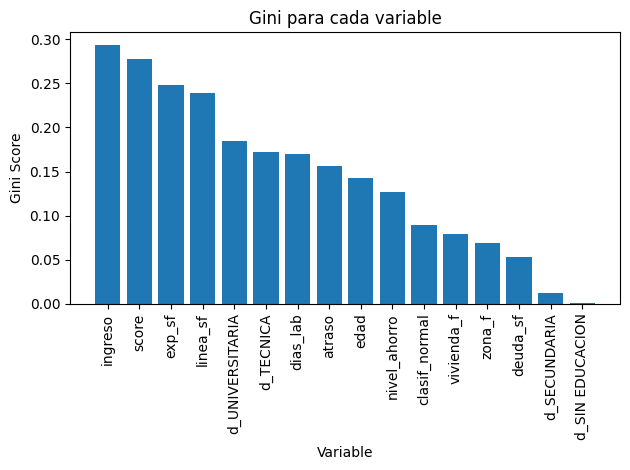

In [81]:
# Análisis del poder de discriminación de las variables

# Creando objetos en blanco
gini_vars=[]
# Creando variables para calcular el gini
variables=['ingreso','atraso','edad','linea_sf','deuda_sf', 'exp_sf', 'dias_lab', 'score', 'nivel_ahorro', 'vivienda_f', 'd_SECUNDARIA', 'd_SIN EDUCACION', 'd_TECNICA', 'd_UNIVERSITARIA', 'zona_f', 'clasif_normal']
# Iterando sobre las variables
for i in variables:
  gini_vars.append(np.abs(2*roc_auc_score(ytrain.mora,Xtrain[i])-1))

# Mostrando los resultados
gini_df = pd.DataFrame({'Variable': variables, 'Gini': gini_vars})
gini_df = gini_df.sort_values(by='Gini', ascending=False)
print("Gini para cada variable:")
print(gini_df)

import matplotlib.pyplot as plt
plt.bar(gini_df['Variable'], gini_df['Gini'])
plt.xlabel('Variable')
plt.ylabel('Gini Score')
plt.title('Gini para cada variable')
plt.xticks(rotation=90) # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [82]:
# Arboles de decisión

from sklearn.tree import DecisionTreeRegressor # Libreria
arbol=DecisionTreeRegressor(max_depth=15) # Objeto
arbol.fit(Xtrain,ytrain.mora) # Entrenamiento

DecisionTreeRegressor(max_depth=15)

In [83]:
# Performance - Rcuadrado (No importa)
print(arbol.score(Xtrain,ytrain.mora))
print(arbol.score(Xtest,ytest.mora))

0.8515513585533396
0.28976672311829976


In [84]:
# Importancia de las variables
importancia=pd.DataFrame(arbol.feature_importances_)
importancia.index=Xtrain.columns
importancia.columns=['Ganancia de Información']
importancia.sort_values(by='Ganancia de Información',inplace=True,ascending=False)
importancia

,Ganancia de Información
exp_sf,0.162316
dias_lab,0.133494
deuda_sf,0.122698
linea_sf,0.115531
ingreso,0.114941
edad,0.100291
score,0.090289
atraso,0.056324
nivel_ahorro,0.036026
clasif_normal,0.024584


In [85]:
# Calculando el gini
print(2*roc_auc_score(ytrain.mora,arbol.predict(Xtrain))-1)
print(2*roc_auc_score(ytest.mora,arbol.predict(Xtest))-1)

0.9821298324718297
0.6733034991262841


In [86]:
# Corrigiendo overfitting: Optimizando los hiper parámetros del algoritmo y seleccionando variables
from sklearn.model_selection import GridSearchCV

# Optimizando el max_depth
max_space=np.array(range(1,31)) # Valores a probar
param_grid={'max_depth':max_space} # Objeto a optimizar
arbol_grid=DecisionTreeRegressor() # Objeto ML
# Aplicando algoritmo
arbol_gscv=GridSearchCV(arbol_grid,param_grid,cv=5) # Objeto GSCV
arbol_gscv.fit(Xtrain,ytrain.mora)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [88]:
# Resultados optimo
print(arbol_gscv.score(Xtrain,ytrain.mora))    # 0.2209, indica que el modelo optimizado esta rindiendo mejor en los datos de entrenamiento.
print(arbol_gscv.score(Xtest,ytest.mora))      # 0.1682, para el modelo de prueba, lo que indica que el modelo optimizado tiene un rendimiento del 16.82%, sugiriendo que el modelo aun tine dificultades para capturar adecuanda la variabilidad en los datos de prueba. El modelo aun necesita mejorar su capacidad de predicción en los datos de prueba.

0.22093940389640454
0.16829222565257285


In [90]:
# Parámetros óptimos
arbol_gscv.best_params_   # La profundidad maxima del arbol es de 6 niveles, lo que siginifaca que el arbol tendra como maximo 6 niveles de profundidad, esto limita la complejidad del modelo y tambien ayuda de que el modelo sea mas manejable y mas interpretable.

{'max_depth': np.int64(6)}

In [91]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# Generando objeto
rf = RandomForestClassifier(n_estimators=100, random_state=42)   # 100 arboles de decision.

# Entrenamiento
rf.fit(Xtrain, ytrain.mora)

RandomForestClassifier(random_state=42)

In [92]:
# Rendimiento

# Precisión
print("Precisión en el conjunto de entrenamiento:", rf.score(Xtrain, ytrain.mora))
print("Precisión en el conjunto de prueba:", rf.score(Xtest, ytest.mora))

# Gini
ytrain['rf_pr_y'] = rf.predict_proba(Xtrain)[:, 1]
ytest['rf_pr_y'] = rf.predict_proba(Xtest)[:, 1]

print("Gini en el conjunto de entrenamiento:", 2 * roc_auc_score(ytrain.mora, ytrain['rf_pr_y']) - 1)
print("Gini en el conjunto de prueba:", 2 * roc_auc_score(ytest.mora, ytest['rf_pr_y']) - 1)

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.8970238095238096
Gini en el conjunto de entrenamiento: 0.9999999999999998
Gini en el conjunto de prueba: 0.888646805608831


In [93]:
# Clasificador Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Generando objeto
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenamiento
gb.fit(Xtrain, ytrain.mora)

GradientBoostingClassifier(random_state=42)

In [94]:
# Evaluación del Rendimiento del Modelo Gradient Boosting

# Exactitud (Accuracy)
print("Exactitud en conjunto de entrenamiento:", gb.score(Xtrain, ytrain.mora))
print("Exactitud en conjunto de prueba:", gb.score(Xtest, ytest.mora))

# Coeficiente de Gini
ytrain['gb_pr_y'] = gb.predict_proba(Xtrain)[:, 1]  # Probabilidades predichas para el conjunto de entrenamiento
ytest['gb_pr_y'] = gb.predict_proba(Xtest)[:, 1]    # Probabilidades predichas para el conjunto de prueba

print("Coeficiente de Gini en conjunto de entrenamiento:", 2 * roc_auc_score(ytrain.mora, ytrain['gb_pr_y']) - 1)
print("Coeficiente de Gini en conjunto de prueba:", 2 * roc_auc_score(ytest.mora, ytest['gb_pr_y']) - 1)

Exactitud en conjunto de entrenamiento: 0.7844917398422384
Exactitud en conjunto de prueba: 0.763095238095238
Coeficiente de Gini en conjunto de entrenamiento: 0.6399148806809545
Coeficiente de Gini en conjunto de prueba: 0.5411021608489963


**Resumen de hallazgos**

Hemos explorado varios modelos de clasificación para identificar los principales determinantes de la morosidad:

*   **Regresión Logística:** Este modelo nos permitió analizar la **significancia estadística** y el **poder de discriminación (Gini)** de cada variable. Las variables con mayor poder de discriminación (Gini) fueron `ingreso`, `score`, `exp_sf`, `linea_sf` y `d_UNIVERSITARIA`.
*   **Árbol de Decisión:** Con este modelo, analizamos la **importancia de las variables** basada en la ganancia de información. Las variables más importantes según el árbol de decisión fueron `exp_sf`, `dias_lab`, `ingreso`, `deuda_sf` y `linea_sf`. También optimizamos la profundidad máxima del árbol para evitar el sobreajuste, encontrando que una profundidad de 6 fue óptima.
*   **Random Forest:** Este modelo de conjunto mostró un alto rendimiento en el conjunto de entrenamiento (Accuracy: 1.0, Gini: 1.0), lo que sugiere un posible sobreajuste. Sin embargo, tuvo un buen rendimiento en el conjunto de prueba (Accuracy: 0.897, Gini: 0.889), siendo el modelo con mejor rendimiento en el conjunto de prueba de los explorados hasta ahora.
*   **Gradient Boosting:** Este modelo de conjunto también mostró un buen rendimiento, aunque ligeramente inferior al Random Forest en el conjunto de prueba (Accuracy: 0.763, Gini: 0.541).

En general, las variables relacionadas con **información financiera** (`ingreso`, `linea_sf`, `deuda_sf`), **experiencia crediticia** (`exp_sf`, `score`, `dias_lab`) y el **nivel educativo** (`d_UNIVERSITARIA`, `d_TECNICA`) parecen ser los determinantes más importantes de la morosidad en este conjunto de datos.

Considerando el rendimiento en el conjunto de prueba, el modelo **Random Forest** parece ser el más prometedor para predecir la morosidad.

**Próximos pasos sugeridos:**

*   Realizar una **optimización de hiperparámetros** más exhaustiva para los modelos Random Forest y Gradient Boosting.
*   Evaluar la **calibración** de los modelos con mejor rendimiento.
*   Considerar la aplicación de **otras técnicas de modelado**, como redes neuronales.
*   Generar un **informe detallado** de los hallazgos y el modelo recomendado.

## Parte 2: Ratios de Incumplimiento Geográfico y Educativo, Calibración del Modelo y Estrategias de Crédito
# En esta parte del análisis, realizaremos:
# 1. Analizar la ratio de incumplimiento por ubicación geográfica.
# 2. Analizar la ratio de incumplimiento por nivel educativo.
# 3. Evaluar la calibración del modelo de regresión logística.
# 4. Sugerir estrategias de crédito potenciales basadas en los hallazgos.

In [95]:
# Analizar la ratio de incumplimiento por ubicación geográfica
incumplimiento_por_zona = data.groupby('zona')['mora'].mean().reset_index()
print("Ratio de incumplimiento por ubicación geográfica:")
print(incumplimiento_por_zona)

Ratio de incumplimiento por ubicación geográfica:
             zona      mora
0        Amazonas  1.000000
1          Ancash  0.772321
2        Apurimac  0.750000
3        Arequipa  0.558739
4        Ayacucho  0.652174
5       Cajamarca  0.705202
6          Callao  0.767258
7           Cuzco  0.666667
8    Huancavelica  0.333333
9         Huanuco  0.675676
10            Ica  0.783333
11          Junin  0.733840
12    La Libertad  0.769575
13     Lambayeque  0.695341
14           Lima  0.673896
15         Loreto  0.932203
16  Madre de Dios  0.833333
17       Moquegua  0.630435
18          Pasco  0.849057
19          Piura  0.853047
20           Puno  0.739130
21     San Martin  0.977778
22          Tacna  0.593750
23         Tumbes  0.863636
24        Ucayali  0.894118


In [96]:
# Analizar la ratio de incumplimiento por nivel educativo
incumplimiento_por_educ = data.groupby('nivel_educ')['mora'].mean().reset_index()
print("\nRatio de incumplimiento por nivel educativo:")
print(incumplimiento_por_educ)


Ratio de incumplimiento por nivel educativo:
      nivel_educ      mora
0     SECUNDARIA  0.805243
1  SIN EDUCACION  0.666667
2        TECNICA  0.790754
3  UNIVERSITARIA  0.639733


In [97]:
# Evaluar la calibración del modelo de regresión logística
# En términos generales (revisando cálculo previo)
print("Tasa promedio de incumplimiento (Entrenamiento):", np.mean(ytrain.mora))
print("Probabilidad promedio predicha (Entrenamiento):", np.mean(ytrain.pr_y))
print("Tasa promedio de incumplimiento (Prueba):", np.mean(ytest.mora))
print("Probabilidad promedio predicha (Prueba):", np.mean(ytest.pr_y))

Tasa promedio de incumplimiento (Entrenamiento): 0.7039738056258372
Probabilidad promedio predicha (Entrenamiento): 0.6957042726945369
Tasa promedio de incumplimiento (Prueba): 0.7053571428571429
Probabilidad promedio predicha (Prueba): 0.6944281323369375


In [98]:
# Precisión por factores: Nivel de ahorro
perf1 = pd.DataFrame(data_train.groupby(['nivel_ahorro'])['mora'].agg(N='count', TD='mean'))
data_train['pr_y'] = logistic.predict_proba(Xtrain)[:, 1]
perf2 = pd.DataFrame(data_train.groupby(['nivel_ahorro'])['pr_y'].agg(PD='mean'))
perf_ahorro = pd.concat([perf1, perf2], axis=1)

# Intervalos de confianza
perf_ahorro['LS'] = perf_ahorro.PD - z * (perf_ahorro.PD * (1 - perf_ahorro.PD) / perf_ahorro.N)**0.5
perf_ahorro['LI'] = perf_ahorro.PD + z * (perf_ahorro.PD * (1 - perf_ahorro.PD) / perf_ahorro.N)**0.5
perf_ahorro

,N,TD,PD,LS,LI
nivel_ahorro,,,,,
0,393,0.773537,0.708389,0.753325,0.663454
1,74,0.851351,0.739160,0.839203,0.639116
2,57,0.824561,0.751341,0.863551,0.639131
3,51,0.764706,0.742215,0.862264,0.622167
4,79,0.886076,0.747279,0.843108,0.651450
5,56,0.928571,0.738150,0.853297,0.623003
6,78,0.833333,0.691661,0.794146,0.589176
7,60,0.850000,0.759825,0.867916,0.651733
8,79,0.810127,0.710471,0.810483,0.610459


In [99]:
data_train=pd.concat([Xtrain,ytrain],axis=1)
data_test=pd.concat([Xtest,ytest],axis=1)

In [101]:
# Precisión por drivers: Clasificación SBS
perf1=pd.DataFrame(data_train.groupby(['clasif_normal'])['mora'].agg(N='count',RD='mean'))
data_train['pr_y']=logistic.predict_proba(Xtrain)[:,1]
perf2=pd.DataFrame(data_train.groupby(['clasif_normal'])['pr_y'].agg(PD='mean'))
perf_ahorro=pd.concat([perf1,perf2],axis=1)
# Intervalos de confianza
perf_ahorro['LS']=perf_ahorro.PD-z*(perf_ahorro.PD*(1-perf_ahorro.PD)/perf_ahorro.N)**0.5
perf_ahorro['LI']=perf_ahorro.PD+z*(perf_ahorro.PD*(1-perf_ahorro.PD)/perf_ahorro.N)**0.5
perf_ahorro

,N,RD,PD,LS,LI
clasif_normal,,,,,
0,2469,0.754557,0.699048,0.71714,0.680956
1,4250,0.674588,0.693762,0.70762,0.679904


## Resumen de Hallazgos de la Parte 2 y Estrategias de Crédito

Basándose en el análisis de ratios de incumplimiento y calibración del modelo:

* **Ubicación Geográfica:** Los ratios de incumplimiento varían significativamente entre diferentes zonas. Algunas regiones como Amazonas, San Martín, Ucayali, Piura y Pasco muestran tasas de incumplimiento particularmente altas, mientras que áreas como Huancavelica, Arequipa, Moquegua, Cuzco, Huánuco y Lima tienen tasas de incumplimiento relativamente más bajas. Esto sugiere que la ubicación geográfica es un factor importante para predecir el incumplimiento.

* **Nivel Educativo:** También existen diferencias notables en las tasas de incumplimiento entre niveles educativos. Las personas con niveles de educación "SECUNDARIA" y "TÉCNICA" tienen tasas de incumplimiento más altas comparadas con aquellas con educación "UNIVERSITARIA". La categoría "SIN EDUCACIÓN" tiene una alta tasa de incumplimiento, pero el tamaño de la muestra es pequeño.

* **Calibración del Modelo:** El modelo de regresión logística parece estar razonablemente bien calibrado en términos generales, con la probabilidad promedio predicha alineándose estrechamente con la tasa real promedio de incumplimiento tanto en los conjuntos de entrenamiento como de prueba. El análisis de calibración por 'nivel_ahorro' y 'clasif_normal' proporciona perspectivas adicionales sobre qué tan bien se alinean las probabilidades predichas del modelo con las tasas reales de incumplimiento dentro de estos segmentos.

**Estrategias Potenciales de Crédito:**

Basándose en estos hallazgos, aquí están algunas estrategias potenciales de crédito:

* **Estrategias Geográficamente Dirigidas:**
    * **Zonas de Mayor Riesgo:** Para zonas con altas tasas de incumplimiento (ej., Amazonas, San Martín, Ucayali), la compañía podría considerar criterios de elegibilidad más estrictos, tasas de interés más altas, límites de crédito más bajos, o esfuerzos de cobranza mejorados.
    * **Zonas de Menor Riesgo:** En zonas con tasas de incumplimiento más bajas (ej., Huancavelica, Arequipa, Moquegua), la compañía podría considerar criterios más flexibles, tasas de interés más bajas, o límites de crédito más altos para aumentar la penetración de mercado.

* **Estrategias Dirigidas por Nivel Educativo:**
    * **Niveles Educativos de Mayor Riesgo:** Para individuos con educación "SECUNDARIA" y "TÉCNICA", la compañía podría considerar estrategias similares a las de zonas geográficas de mayor riesgo (criterios más estrictos, tasas más altas, etc.).
    * **Niveles Educativos de Menor Riesgo:** Para individuos con educación "UNIVERSITARIA", se podrían ofrecer términos más favorables.

* **Precios Basados en Riesgo:** Implementar una estrategia de precios basada en riesgo donde las tasas de interés y comisiones se ajusten basándose en la probabilidad predicha de incumplimiento del modelo. Los clientes con una mayor probabilidad predicha de incumplimiento serían cobrados con tasas más altas.

* **Ofertas de Productos Específicos por Segmento:** Desarrollar productos de crédito adaptados a los perfiles de riesgo de diferentes segmentos. Por ejemplo, ofrecer montos de préstamo más pequeños o términos de pago más cortos a segmentos de mayor riesgo.

* **Recolección Mejorada de Datos:** Invertir en recopilar datos más granulares sobre ubicación geográfica y potencialmente otros factores socioeconómicos que podrían mejorar aún más el poder predictivo del modelo y permitir estrategias más dirigidas.

* **Monitoreo Continuo y Recalibración del Modelo:** Monitorear regularmente el desempeño del modelo y recalibrarlo según sea necesario para asegurar su precisión y efectividad en identificar y manejar el riesgo crediticio.

Estas estrategias deben implementarse cuidadosamente, considerando el impacto potencial en el crecimiento del negocio y el cumplimiento regulatorio. Puede requerirse análisis y pruebas adicionales para determinar las estrategias óptimas para la compañía.

# **3. Definición del Segmento de Prueba Piloto y Recomendación del Modelo**
# En esta sección, realizaremos:
# 1. Definir las características de un segmento atractivo para una prueba piloto, considerando la perspectiva del banco.
# 2. Proporcionar una recomendación sobre si el modelo construido en la primera parte del análisis debería utilizarse para esta prueba piloto.

## Definición de un Segmento Atractivo para la Prueba Piloto

Basándose en el análisis de ratios de incumplimiento por ubicación geográfica y nivel educativo, un segmento atractivo para que el banco conduzca una prueba piloto podría definirse enfocándose en características asociadas con menores tasas de incumplimiento. Considerando los hallazgos:

* **Ubicación Geográfica:** Las regiones con tasas de incumplimiento históricamente más bajas, como Huancavelica, Arequipa, Moquegua, Cuzco, Huánuco y Lima, serían más atractivas para una prueba piloto que busque menor riesgo.

* **Nivel Educativo:** Los individuos con un nivel educativo "UNIVERSITARIA" han mostrado tasas de incumplimiento significativamente más bajas comparado con otros grupos.

Por lo tanto, un segmento atractivo para una prueba piloto podrían ser individuos que residen en **zonas geográficas de menor riesgo (ej., Huancavelica, Arequipa, Moquegua, Cuzco, Huánuco y Lima)** que tienen un **nivel de educación "UNIVERSITARIA"**. Este segmento probablemente tiene un riesgo inherente más bajo de incumplimiento, convirtiéndolos en un objetivo potencialmente rentable para nuevos productos de crédito.

Otros factores que podrían refinar aún más este segmento e identificar potencialmente individuos de riesgo aún menor dentro de este grupo podrían incluir:

* **Mayor Ingreso:** Los individuos con niveles de ingreso más altos han mostrado probabilidades de incumplimiento más bajas según el modelo.

* **Historial Crediticio Positivo:** Aunque no se analizó explícitamente como un ratio de incumplimiento de variable separada, un buen puntaje crediticio (`score`) y menor deuda existente (`deuda_sf`) generalmente se asocian con menor riesgo.

* **Empleo Estable:** Aunque no está directamente disponible como variable categórica con análisis de ratio de incumplimiento, factores como `dias_lab` y potencialmente `exp_sf` podrían ser indicativos de estabilidad laboral, la cual a menudo se vincula con menor riesgo de incumplimiento.

Combinando estas características, un segmento atractivo refinado para la prueba piloto podría ser:

**Individuos que residen en zonas geográficas de menor riesgo con educación "UNIVERSITARIA", mayor ingreso, y un perfil crediticio favorable (buen score, menor deuda).**